In [1]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [2]:
product = 'rgpf'

In [3]:
list_files = glob.glob('/mnt/Data/Data/PF/DF_SA/*.csv')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

3 files found


['/mnt/Data/Data/PF/DF_SA/rgpf_201403_level2.csv',
 '/mnt/Data/Data/PF/DF_SA/rgpf_201404_level2.csv']

In [20]:
list_files[2].split('/')[-1].split('_')[1]

'201405'

In [9]:
# Concatenate all the dataframes
for t in range(3):
    tmp = pd.read_csv(list_files[t])
    if t == 0:
        df = tmp
    else:
        df = df.append(tmp, ignore_index=True)

Exporting figure as ../images/rgpf_maxht40.png


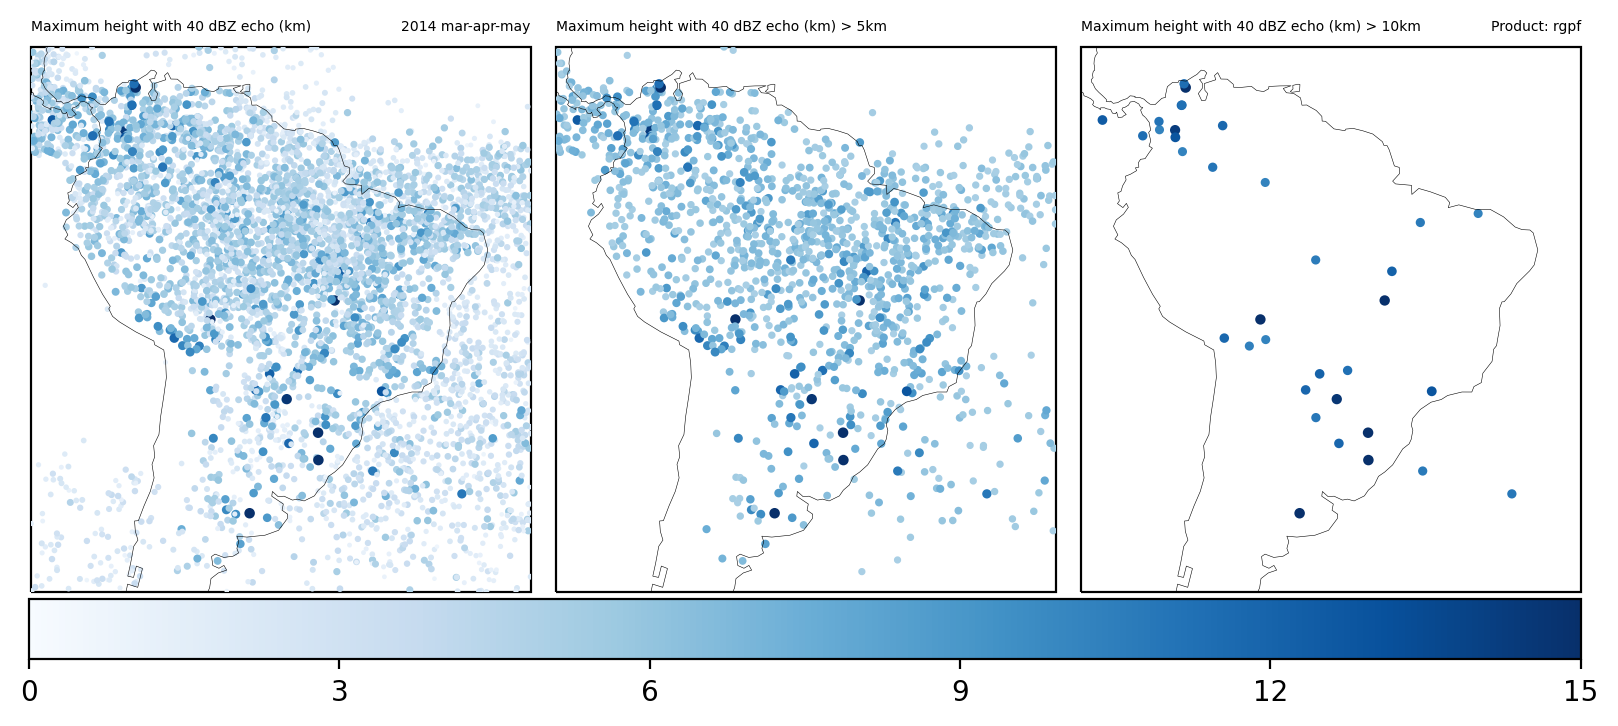

In [23]:
alt_ref = 5
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(df['lon'],df['lat'],c=df['MAXHT40'],cmap=cmap,s=df['MAXHT40']/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=5,loc='left')
ax1.set_title('2014 mar-apr-may',fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(df['lon'][df['MAXHT40']>alt_ref],df['lat'][df['MAXHT40']>alt_ref],c=df['MAXHT40'][df['MAXHT40']>alt_ref],
                cmap=cmap,s=df['MAXHT40'][df['MAXHT40']>alt_ref]/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=5,loc='left')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(df['lon'][df['MAXHT40']>alt_ref2],df['lat'][df['MAXHT40']>alt_ref2],c=df['MAXHT40'][df['MAXHT40']>alt_ref2],
                cmap=cmap,s=df['MAXHT40'][df['MAXHT40']>alt_ref2]/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref2)+'km',fontsize=5,loc='left')
ax1.set_title('Product: '+product,fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=ticks,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)